<a href="https://colab.research.google.com/github/fcolome14/HRCSteelAI/blob/main/TemperingSteelMaterials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Libraries import**

In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**2. Dataset import**

In [454]:
dataset = pd.read_csv('TemperingSteel.csv')
dataset = dataset.rename(columns={'Final hardness (HRC) - post tempering': 'Final HRC'})
dataset.head()

,Source,Steel type,Initial hardness (HRC) - post quenching,Tempering time (s),Tempering temperature (ºC),C (%wt),Mn (%wt),P (%wt),S (%wt),Si (%wt),Ni (%wt),Cr (%wt),Mo (%wt),V (%wt),Al (%wt),Cu (%wt),Final HRC
0,"Grange and Baughman, 1956",AISI-SAE 1026,?,600,204.4,0.25,0.79,0.012,0.026,0.11,0.0,0.0,0.0,0.0,0.0,0.0,50.6
1,"Grange and Baughman, 1956",AISI-SAE 1026,?,600,260.0,0.25,0.79,0.012,0.026,0.11,0.0,0.0,0.0,0.0,0.0,0.0,48.3
2,"Grange and Baughman, 1956",AISI-SAE 1026,?,600,315.6,0.25,0.79,0.012,0.026,0.11,0.0,0.0,0.0,0.0,0.0,0.0,43.7
3,"Grange and Baughman, 1956",AISI-SAE 1026,?,600,371.1,0.25,0.79,0.012,0.026,0.11,0.0,0.0,0.0,0.0,0.0,0.0,40.5
4,"Grange and Baughman, 1956",AISI-SAE 1026,?,600,426.7,0.25,0.79,0.012,0.026,0.11,0.0,0.0,0.0,0.0,0.0,0.0,37.3


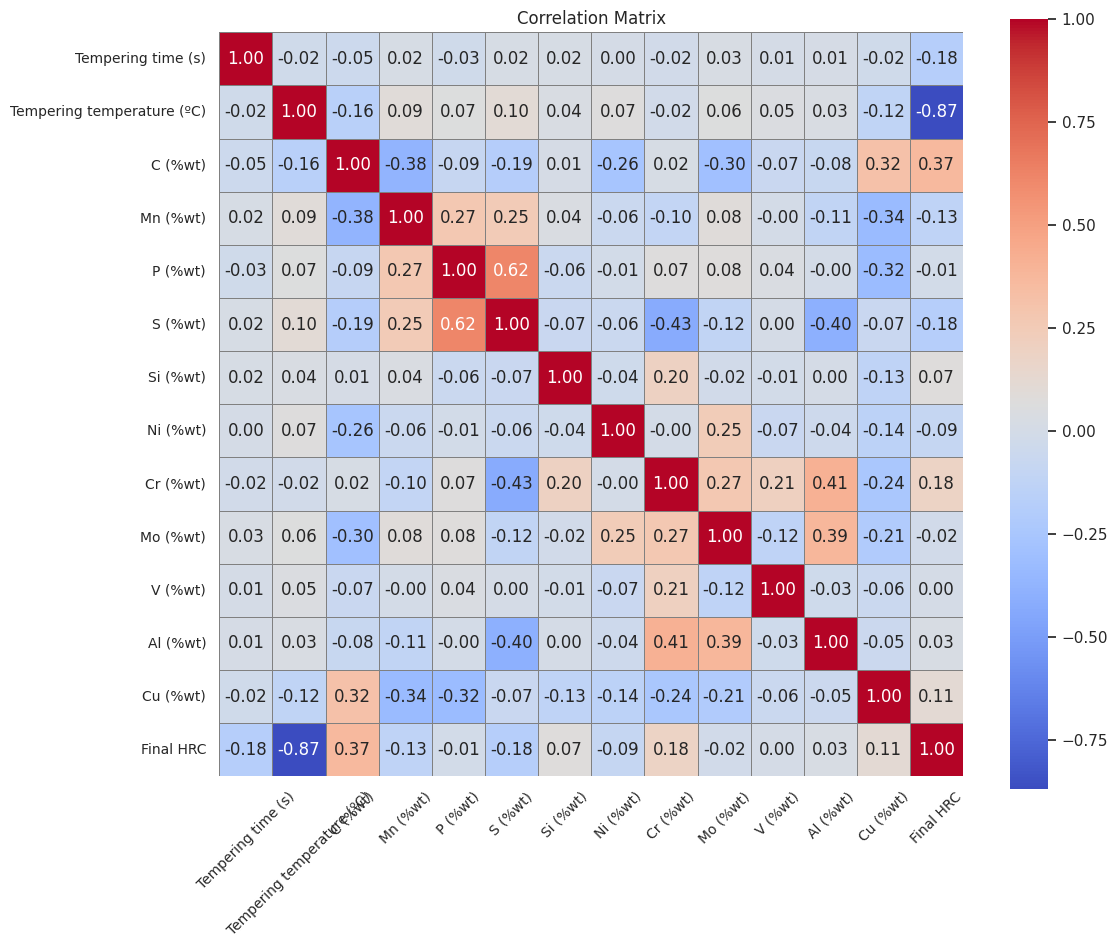

In [455]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_dataset = dataset.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_dataset.corr()

plt.figure(figsize=(12,10))
sns.set(style="white")
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,               # Annotate the cells with correlation values
    fmt=".2f",                # Format the numbers to 2 decimal places
    cmap="coolwarm",          # Set color palette (other options: 'viridis', 'plasma', etc.)
    cbar=True,                # Display the color bar
    square=True,              # Make each cell a square
    linewidths=0.5,           # Add lines between cells
    linecolor='gray'          # Set the line color
)
plt.title('Correlation Matrix')
plt.xticks(fontsize=10, rotation=45)  # Customize x-axis labels
plt.yticks(fontsize=10, rotation=0)   # Customize y-axis labels
plt.show()

**3. Dataset clean up and preprocessing**

In [456]:
non_relevant_cols = dataset.columns[[0,2,3,5,6,7,8,9,10,11,12,13,14, 15]]
dataset = dataset.drop(non_relevant_cols, axis=1)
dataset.head()

,Steel type,Tempering temperature (ºC),Final HRC
0,AISI-SAE 1026,204.4,50.6
1,AISI-SAE 1026,260.0,48.3
2,AISI-SAE 1026,315.6,43.7
3,AISI-SAE 1026,371.1,40.5
4,AISI-SAE 1026,426.7,37.3


Missing values for AISI-SAE 1026: 0


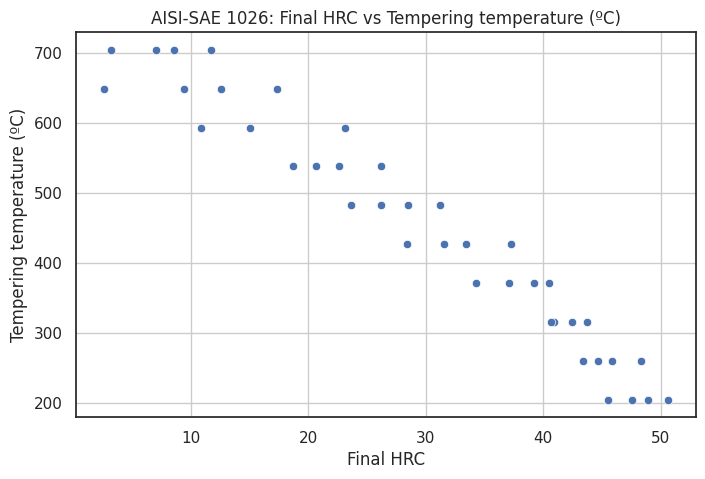

Missing values for AISI-SAE 1030: 0


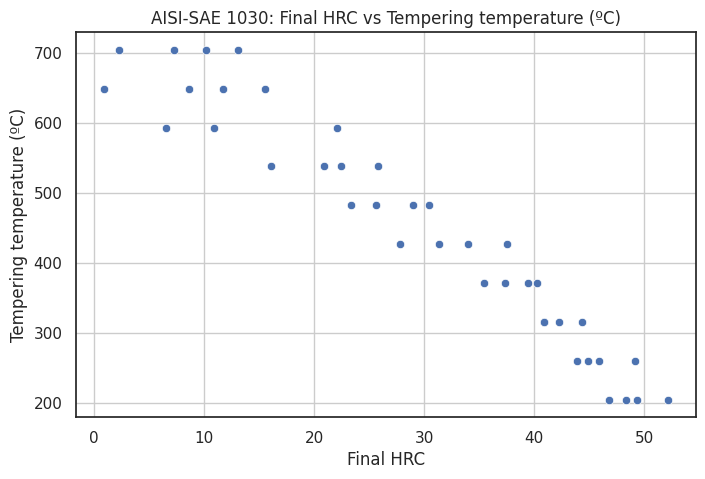

Missing values for AISI-SAE 1035: 0


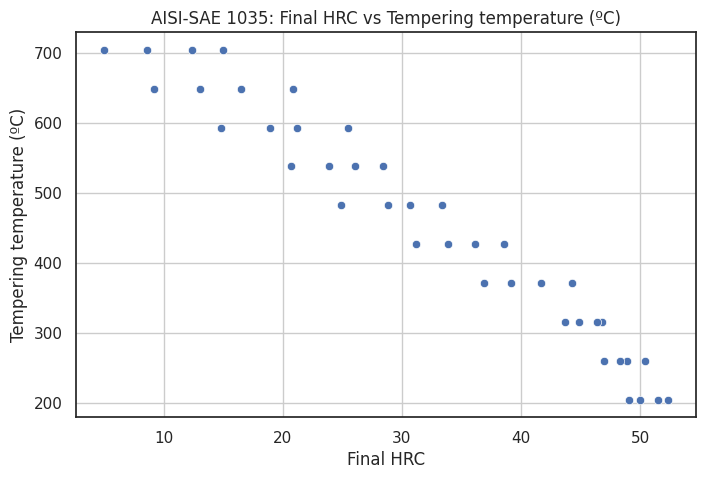

Missing values for AISI-SAE 1038: 0


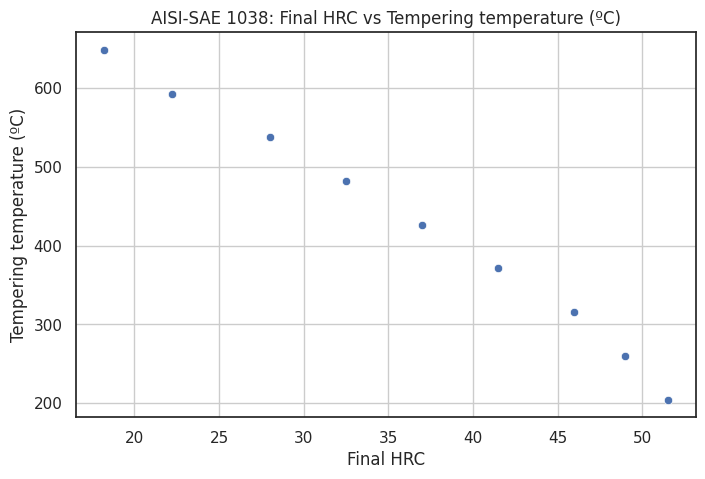

Missing values for AISI-SAE 1040: 0


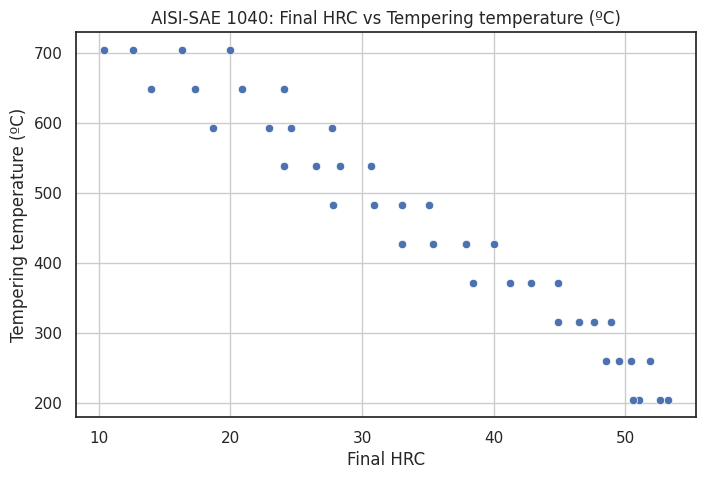

Missing values for AISI-SAE 1042: 0


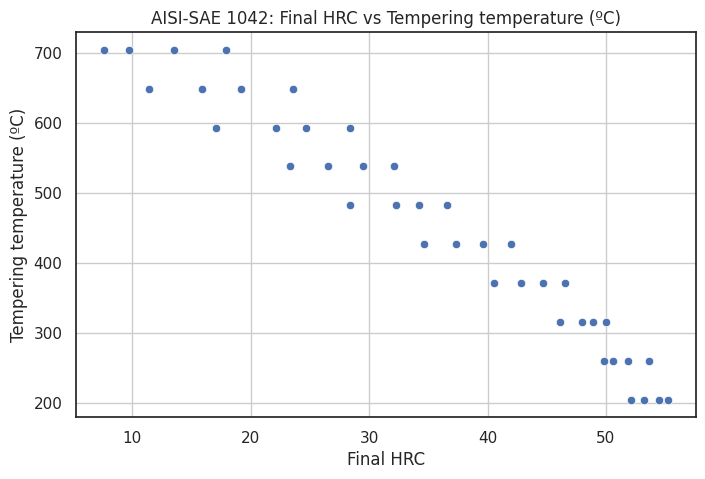

Missing values for AISI-SAE 1045: 0


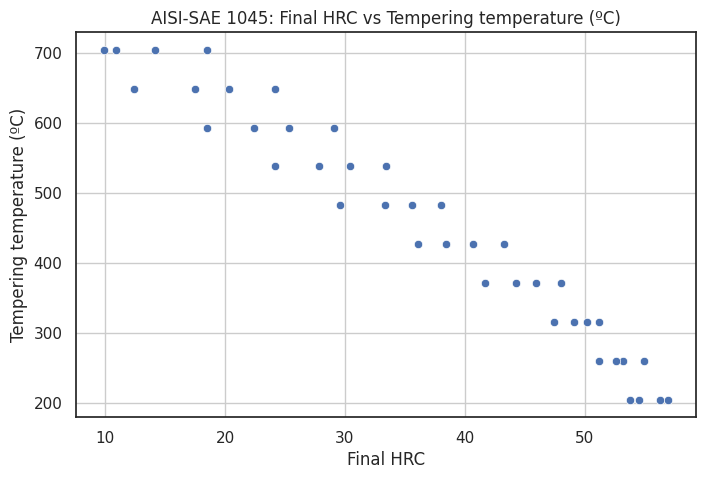

Missing values for AISI-SAE 1049: 0


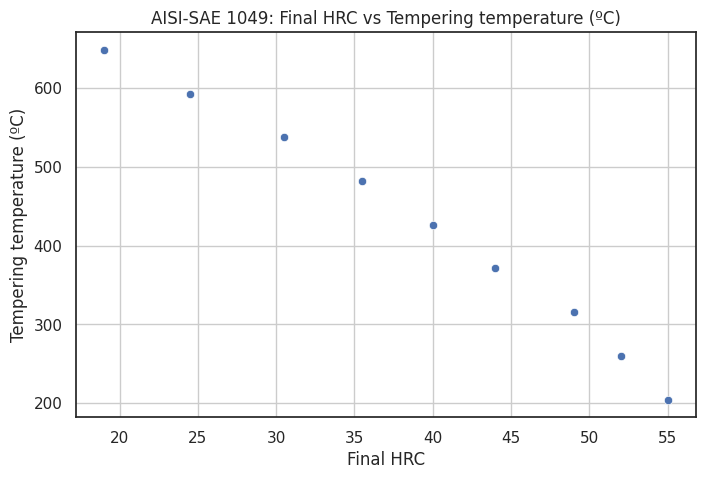

Missing values for AISI-SAE 1050: 0


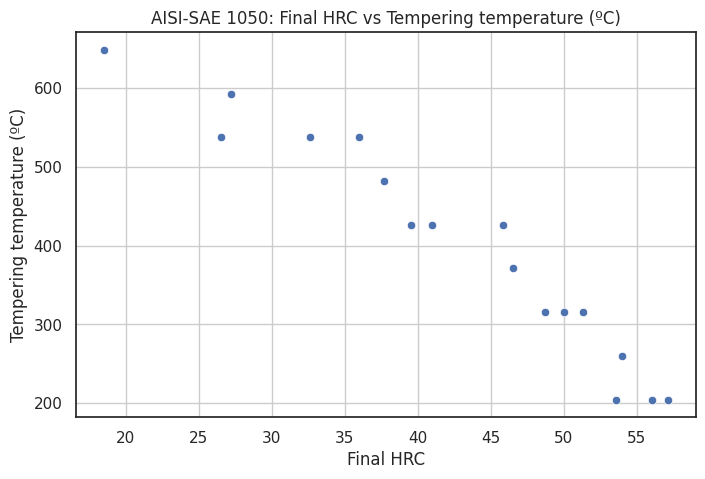

Missing values for AISI-SAE 1065: 0


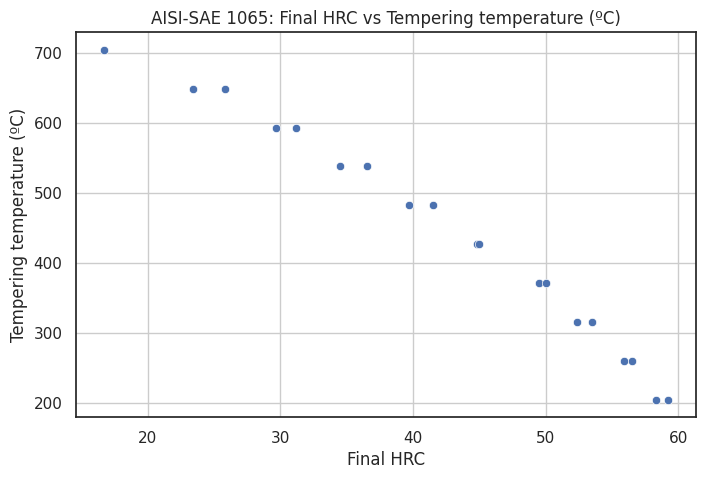

Missing values for AISI-SAE 1080: 0


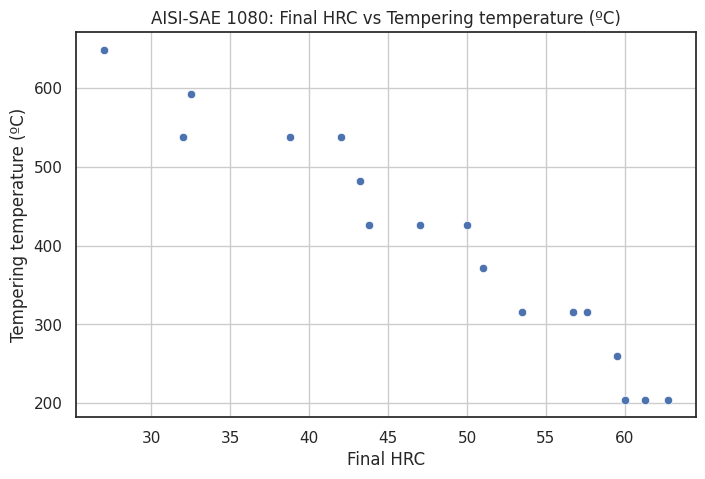

Missing values for AISI-SAE 1335: 0


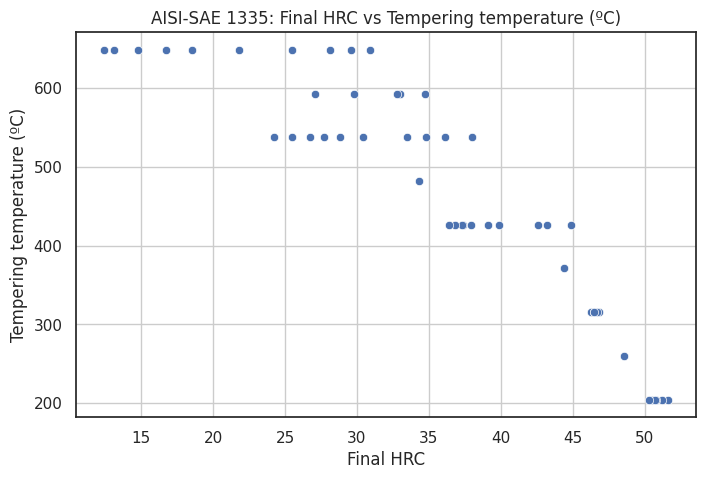

Missing values for AISI-SAE 2340: 0


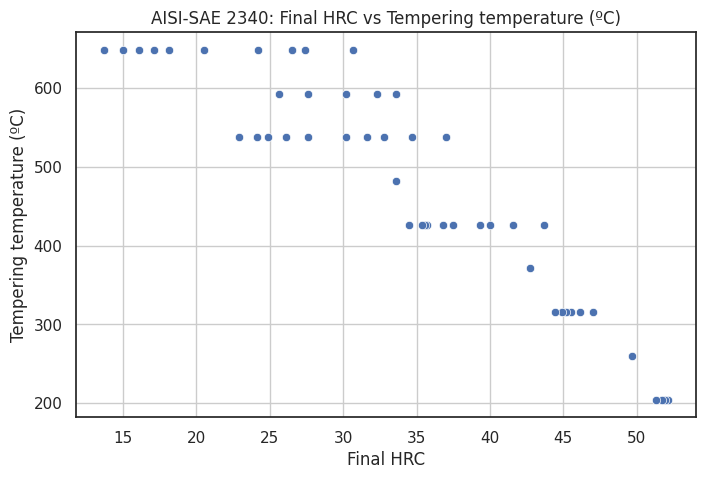

Missing values for AISI-SAE 3140: 0


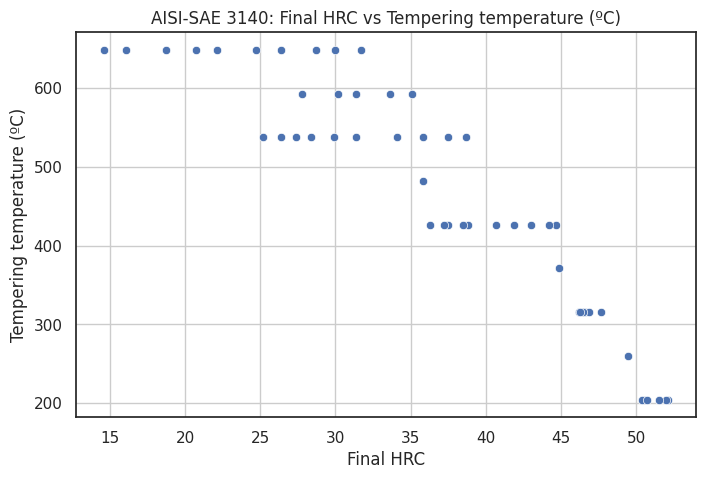

Missing values for AISI-SAE 4027: 0


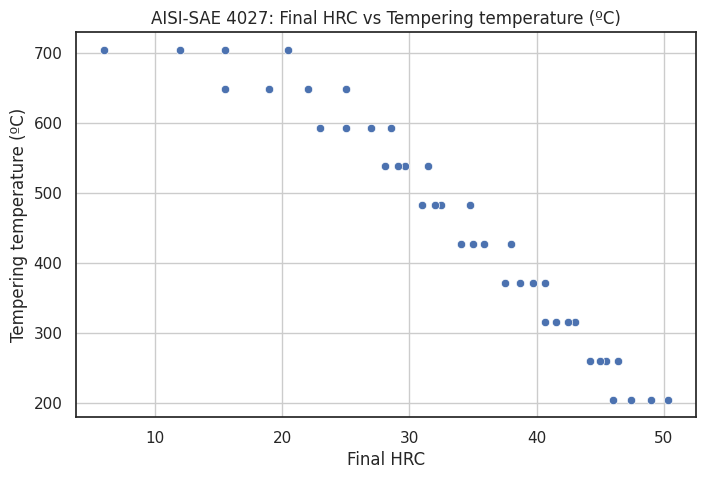

Missing values for AISI-SAE 4037: 0


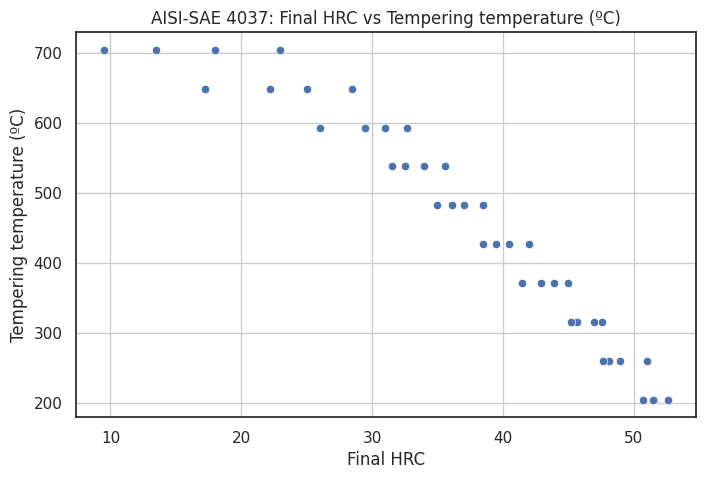

Missing values for AISI-SAE 4047: 0


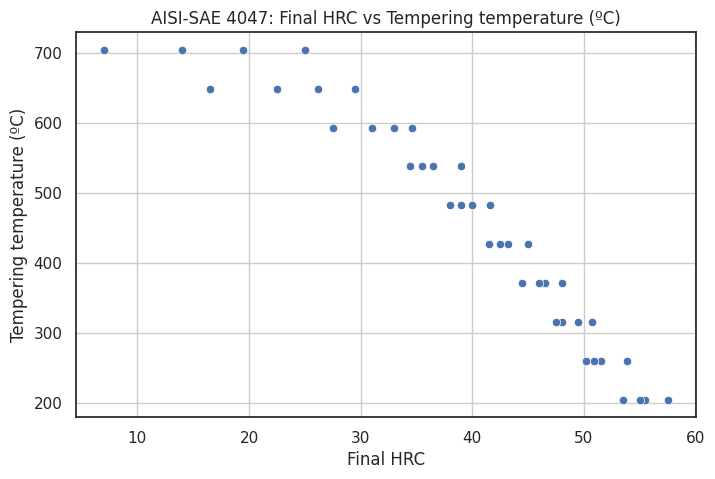

Missing values for AISI-SAE 4068: 0


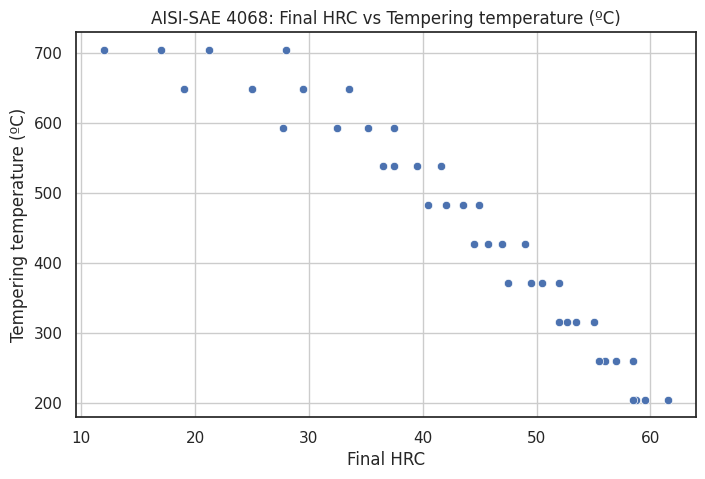

Missing values for AISI-SAE 4140: 0


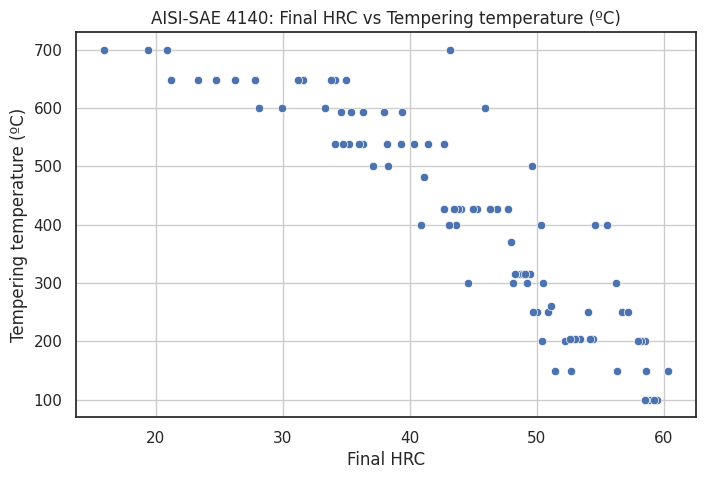

Missing values for AISI-SAE 4340: 0


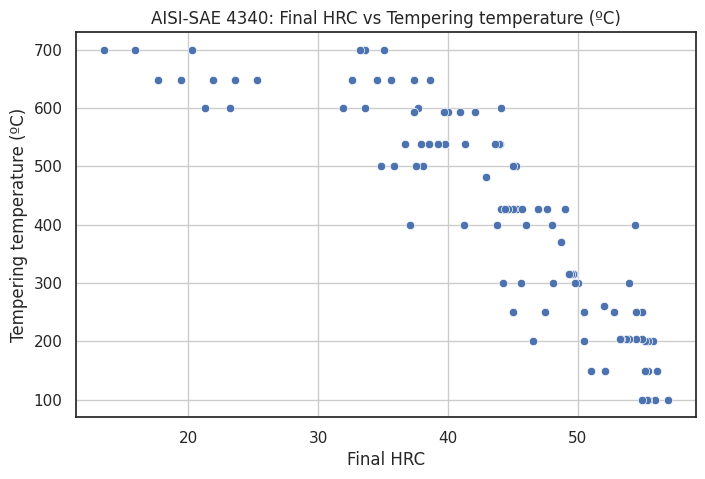

Missing values for AISI-SAE 4640: 0


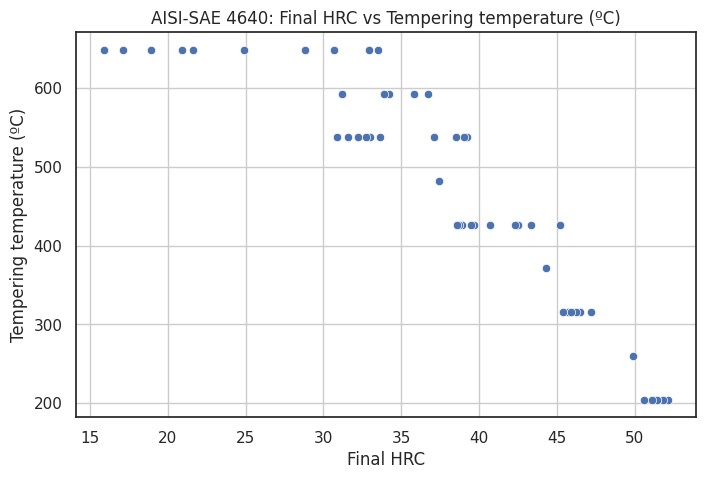

Missing values for AISI-SAE 5140: 0


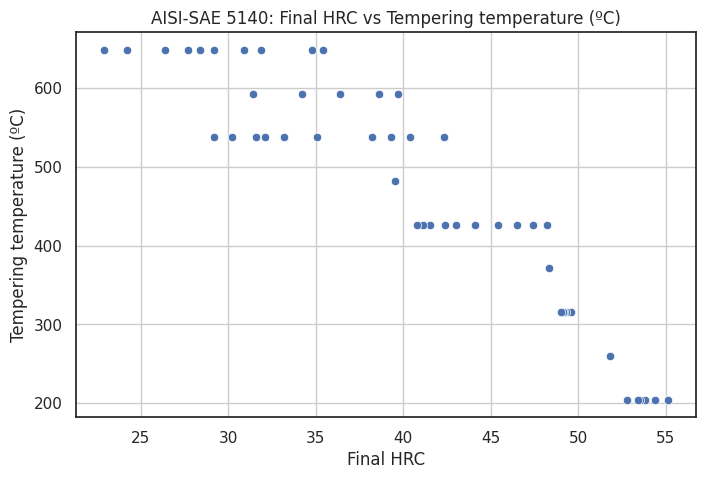

Missing values for AISI-SAE 5160: 0


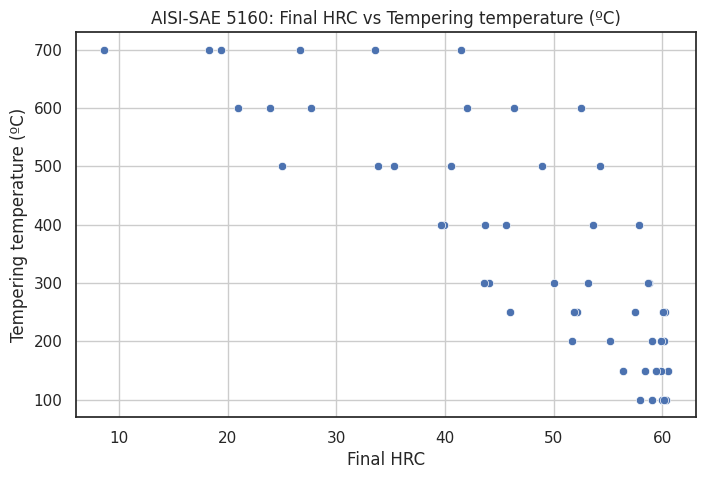

Missing values for AISI-SAE 6145: 0


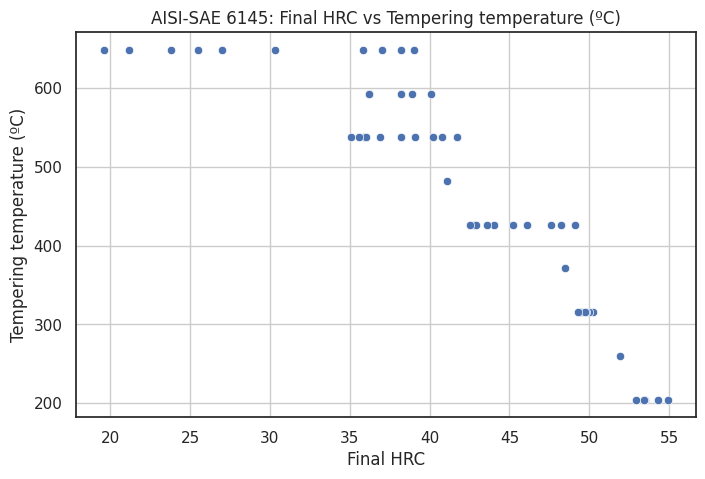

Missing values for AISI-SAE 6150: 0


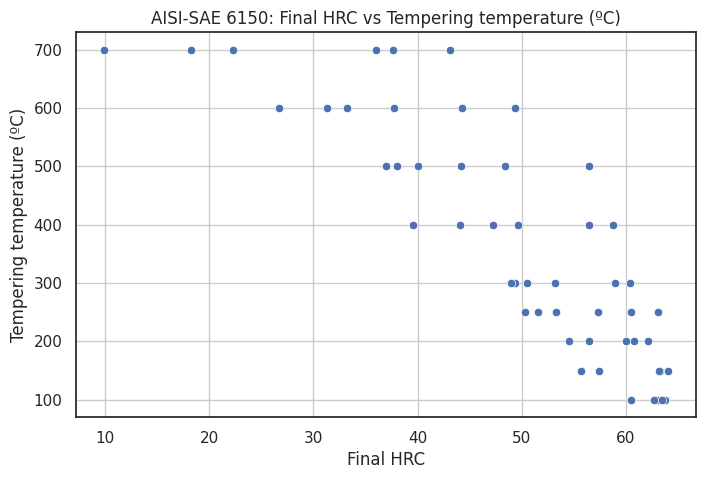

Missing values for AISI-SAE 9264: 0


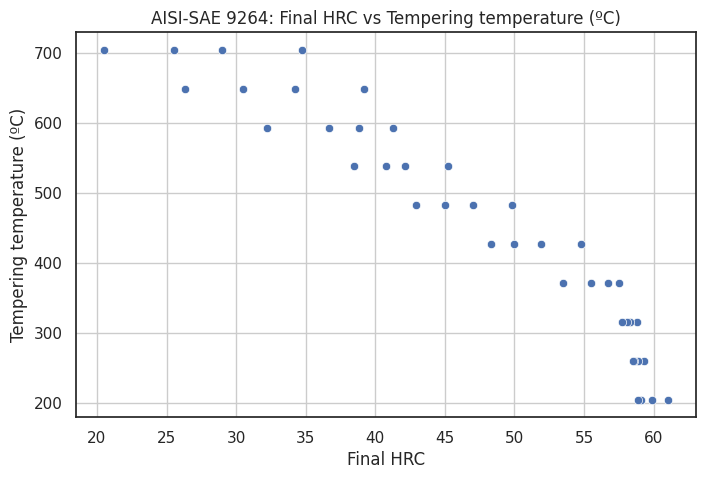

Missing values for AISI-SAE E52100: 0


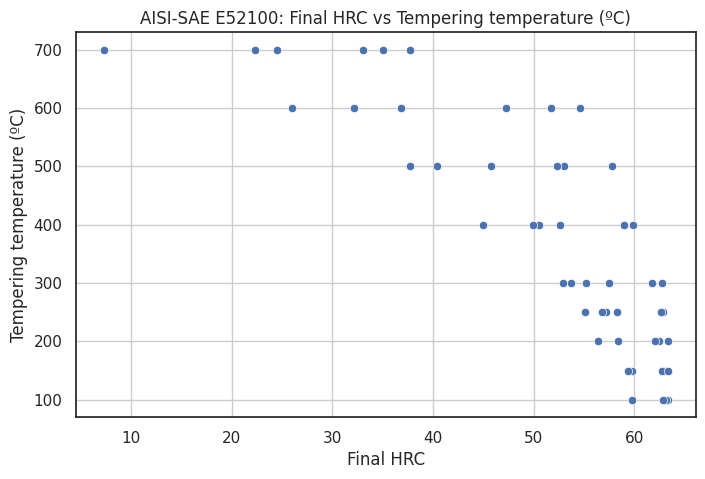

Missing values for Nitriding Steel : 0


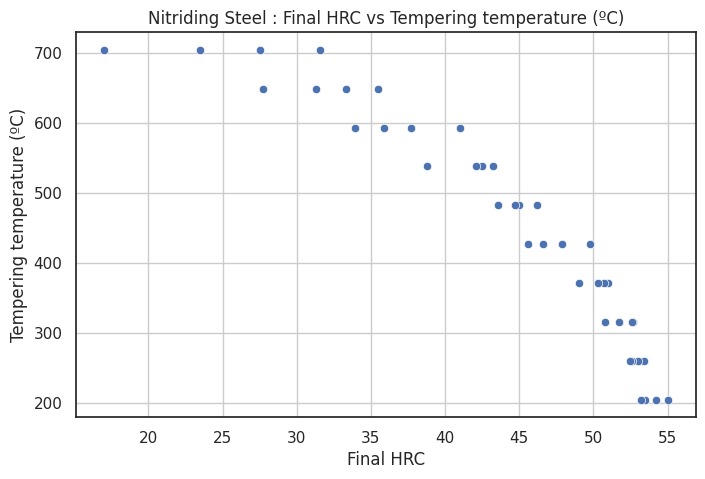

Missing values for 0,31%C - plain carbon steel: 0


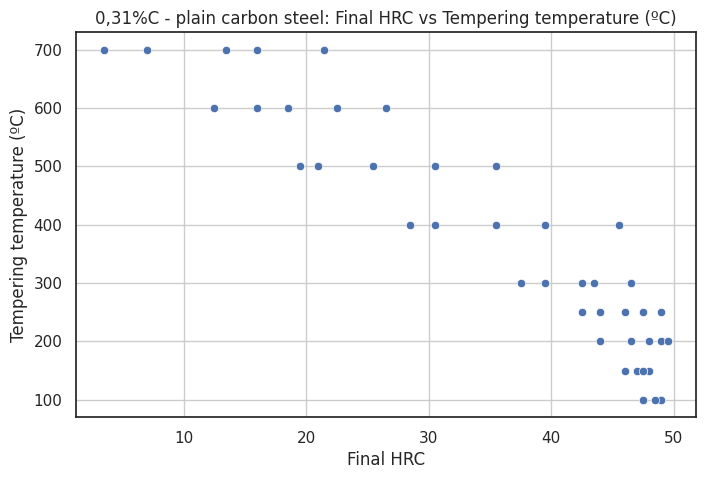

Missing values for 0,56%C - plain carbon steel: 0


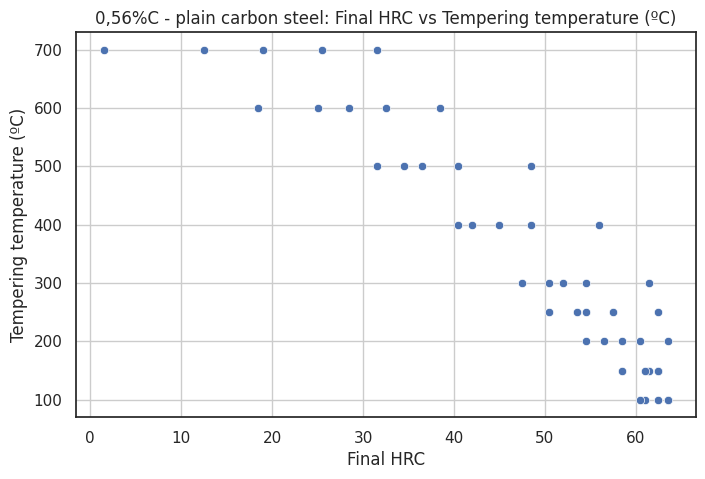

Missing values for 0,74%C - plain carbon steel: 0


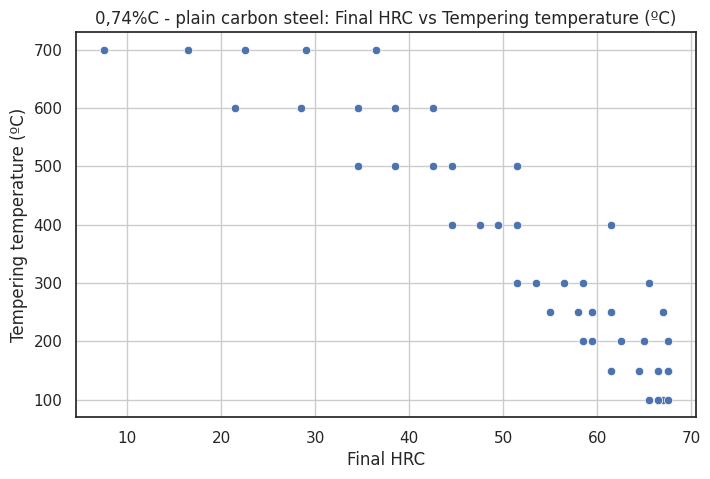

Missing values for 0,89%C - plain carbon steel: 0


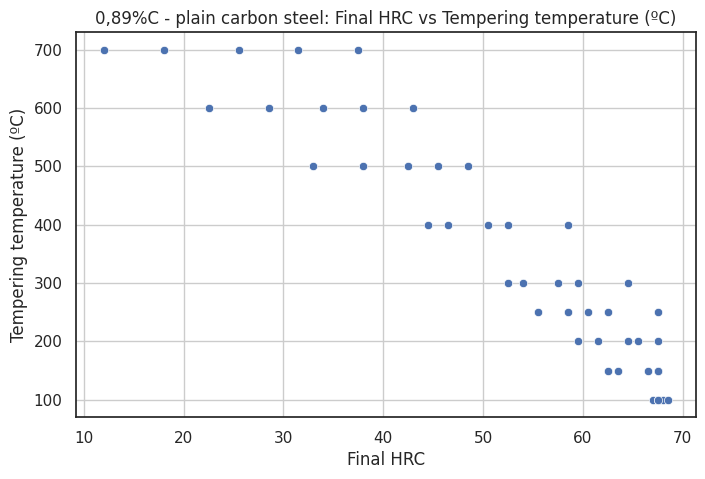

Missing values for 0,98%C - plain carbon steel: 0


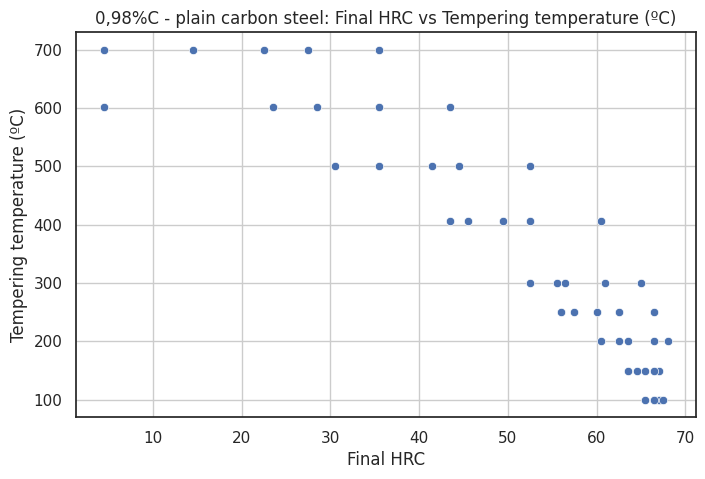

Missing values for 1,15%C - plain carbon steel: 0


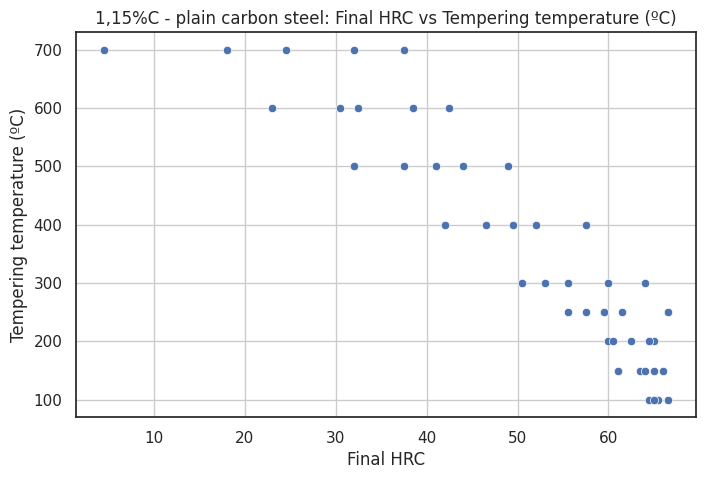

In [457]:
from matplotlib import pyplot as plt
import seaborn as sns

feature_y = "Tempering temperature (ºC)"
feature_x = "Final HRC"
steel_type = dataset['Steel type'].unique()

for category in steel_type:
    print(f"Missing values for {category}:", dataset[column].isnull().sum())
    subset = dataset[dataset['Steel type'] == category]
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=subset, x=feature_x, y=feature_y)
    plt.title(f'{category}: {feature_x} vs {feature_y}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.grid(True)
    plt.show()

After plotting the graphs we can observe a clear nonlinear trend between the tempering temperature and the final HRC. All the steel alloys reach a higher HRC under lower temperatures.Based on the visual pattern, the relationship is not linear but seems to follow a general decreasing trend as tempering temperature increases, with a steeper decline at higher hardness values.

In view of the plots along different tempered alloys we can observe there are some samples like AISI-SAE-1065, AISI-SAE-1043 or AISI-SAE 1038 which define almost a negative linear regression tendency.

In [458]:
feature1 = 'Final HRC'
feature2 = 'Tempering temperature (ºC)'
steel_types = dataset['Steel type'].unique()

In [459]:

def variance_between_features(dataset, feature1, feature2, steel_types):
  for steel in steel_type:
      subset = dataset[dataset['Steel type'] == steel]
      variance = np.var(subset[feature1] - subset[feature2])
      variances.append(variance)
  return variances

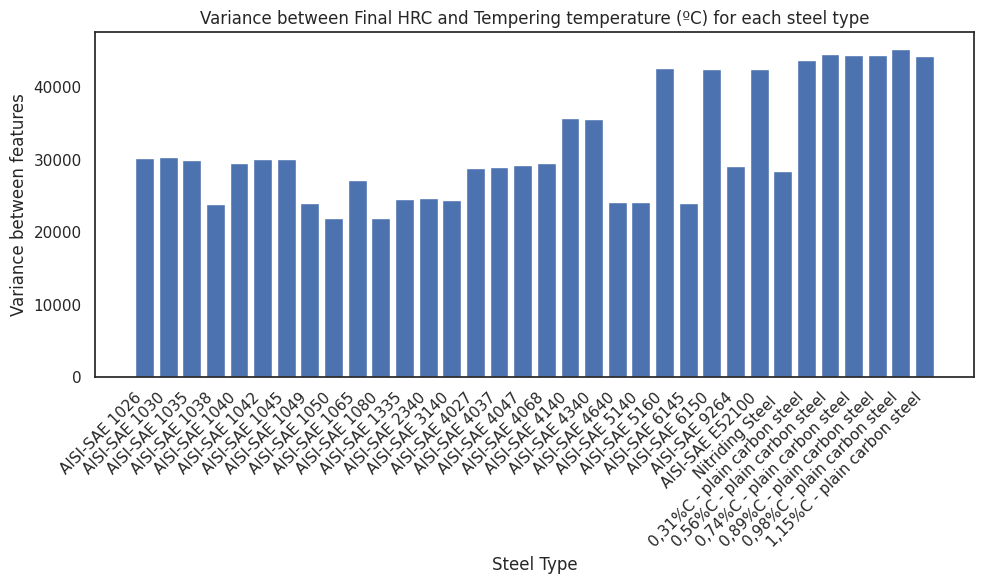

In [460]:
variances = []
variances = variance_between_features(dataset, feature1, feature2, steel_types)
plt.figure(figsize=(10, 6))
plt.bar(steel_types, variances)
plt.xlabel('Steel Type')
plt.ylabel('Variance between features')
plt.title(f'Variance between {feature1} and {feature2} for each steel type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The variance of a set of data points measures how much the values in the dataset differ from the mean. It quantifies the spread or dispersion of the data points, in other words, measures how spread out the data from the mean.
\
\
$Variance = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2$
\
\
Where:
\
$\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$
\
\
Being:
\
$n:$ Number of data points
\
$x_i:$ i-th data point
\
$\bar{x}:$ Mean of all data points
\
\
A low variance mean that points are closer to the mean, there is less variation between them and it's easier to extrapolate within two values with a high accuracy.

The range of variance values are within 20,000 and around 45,000. These range suggests that the variance between features is far from their mean, this can happen because the range of values between 'Final HRC' and 'Tempering temperature (ºC)' might be very different.

To improve the variance between samples, let's try applying standardization to our features

In [461]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset[['Final HRC', 'Tempering temperature (ºC)']] = scaler.fit_transform(dataset[['Final HRC', 'Tempering temperature (ºC)']])

mean = scaler.mean_
std_dev = scaler.scale_
print(f"Final HRC mean: {mean[0]}, Tempering temperature mean: {mean[-1]}")
print(f"Final HRC std. dev.: {std_dev[0]}, Tempering temperature std. dev.: {std_dev[-1]}")


Final HRC mean: 41.468008185538885, Tempering temperature mean: 422.0241473396998
Final HRC std. dev.: 14.074445643790552, Tempering temperature std. dev.: 176.02797349392128


Standard Deviation ($\sigma$) measures the spread or dispersion of data points from the mean. Therefore, Standardization (also known as z-score normalization) transforms the data such that the mean becomes 0 and $\sigma$ becomes 1.
\
\
$x'_i = \frac{x_i - \mu}{\sigma}$
\
\
Where:
\
\
$\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2}$
\
\
$\mu = \frac{1}{n} \sum_{i=1}^n x_i$
\
\
Being:
\
$x_i:$ Orignial value
\
$x'_i:$ Standardized value of $x_i$
\
$\mu:$ Mean of the feature
\
$\sigma:$ Standardized deviation of the feature


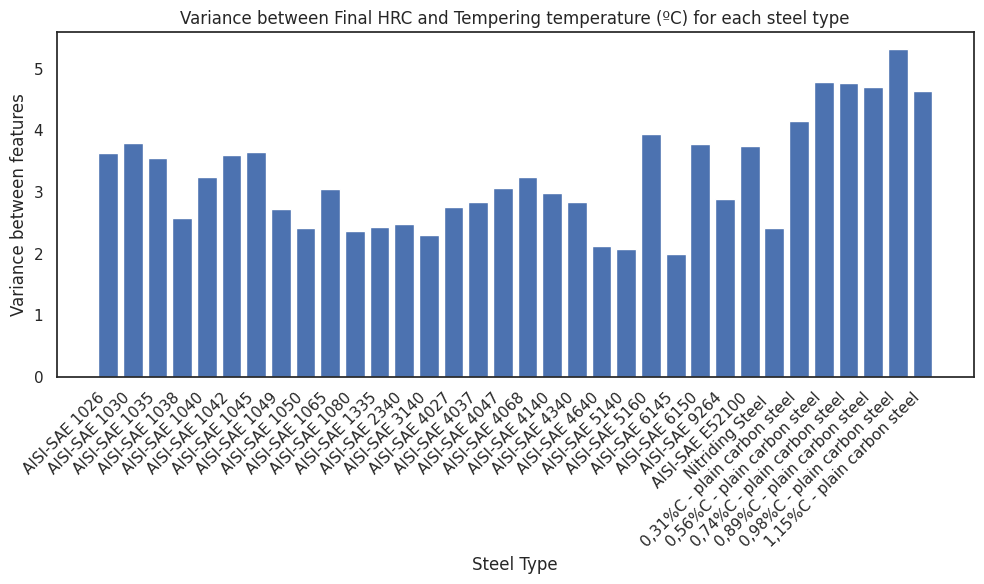

In [462]:
feature1 = 'Final HRC'
feature2 = 'Tempering temperature (ºC)'
steel_types = dataset['Steel type'].unique()
variances = []

variances = variance_between_features(dataset, feature1, feature2, steel_types)

plt.figure(figsize=(10, 6))
plt.bar(steel_types, variances)
plt.xlabel('Steel Type')
plt.ylabel('Variance between features')
plt.title(f'Variance between {feature1} and {feature2} for each steel type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

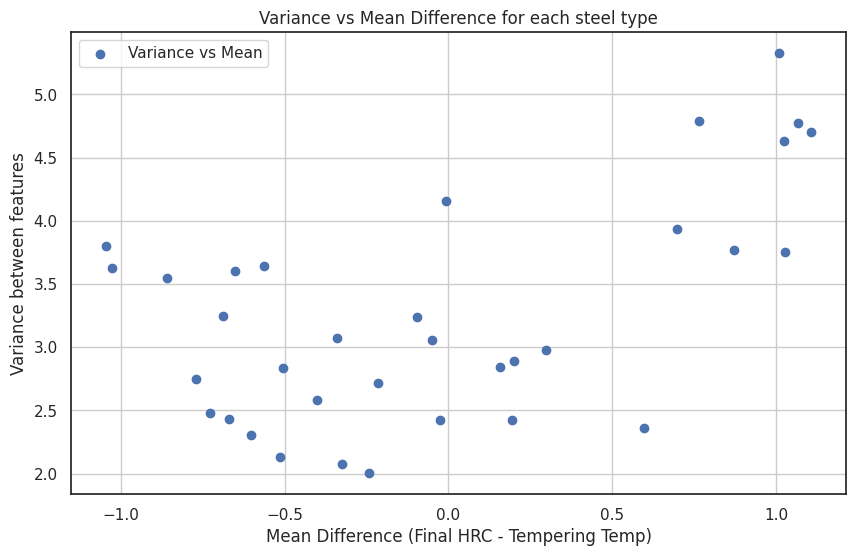

In [463]:
means = []
for steel in steel_types:
    subset = dataset[dataset['Steel type'] == steel]
    means.append(np.mean(subset[feature1] - subset[feature2]))

plt.figure(figsize=(10, 6))
plt.scatter(means, variances, label='Variance vs Mean')  # Plot variances against means

plt.xlabel('Mean Difference (Final HRC - Tempering Temp)')
plt.ylabel('Variance between features')
plt.title('Variance vs Mean Difference for each steel type')
plt.grid(True)
plt.legend()
plt.show()

After applying standardization to features we have reduced the variance between 2 and 5.5 which is a significant improvement:


*   The range between 2 and 5.5 indicates that the feature values are much more tightly clustered compared to the unstandardized version, where variance was between 20,000 and 45,000. That means the model can be trained more accurately.
*   We prevent certain features from dominating due to their scale differences, this can affect the effectivity to of the ML model.



In [464]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

Array to DataFrame converison. Dummy variable for Steel type

In [468]:
X_df = pd.DataFrame(X)
X_dummies = pd.get_dummies(X_df[0], prefix="cat", drop_first=False)

dummy_mapping = {f"cat_{category}": category for category in X_df[0].unique()}
category_to_index = {category: idx for idx, category in enumerate(X_df[0].unique())}

X_df = X_df.drop(columns=[0])
X_combined = pd.concat([X_dummies, X_df], axis=1)

X = X_combined.values

In [469]:
print(category_to_index)

{'AISI-SAE 1026': 0, 'AISI-SAE 1030': 1, 'AISI-SAE 1035': 2, 'AISI-SAE 1038': 3, 'AISI-SAE 1040': 4, 'AISI-SAE 1042': 5, 'AISI-SAE 1045': 6, 'AISI-SAE 1049': 7, 'AISI-SAE 1050': 8, 'AISI-SAE 1065': 9, 'AISI-SAE 1080': 10, 'AISI-SAE 1335': 11, 'AISI-SAE 2340': 12, 'AISI-SAE 3140': 13, 'AISI-SAE 4027': 14, 'AISI-SAE 4037': 15, 'AISI-SAE 4047': 16, 'AISI-SAE 4068': 17, 'AISI-SAE 4140': 18, 'AISI-SAE 4340': 19, 'AISI-SAE 4640': 20, 'AISI-SAE 5140': 21, 'AISI-SAE 5160': 22, 'AISI-SAE 6145': 23, 'AISI-SAE 6150': 24, 'AISI-SAE 9264': 25, 'AISI-SAE E52100': 26, 'Nitriding Steel ': 27, '0,31%C - plain carbon steel': 28, '0,56%C - plain carbon steel': 29, '0,74%C - plain carbon steel': 30, '0,89%C - plain carbon steel': 31, '0,98%C - plain carbon steel': 32, '1,15%C - plain carbon steel': 33}


**4. Splitting data intro training and testing set**

In [470]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**5. Train model**

Due to the observation from the previous plots, the most suitable model could be:

*   Polynomical Regression: $HRC = a + bT + cT^2 + ... + kT^n $
*   Exponential/Log models: $HRC = a e^{-bT} + c$
*   Nonlinear Regression (SVR)

**SVR (Support Vector Regression)** is a regression algorithm that uses support vector machines (SVMs) and tries to find the best-fitting line that minimizes the error between the predicted and actual values.

SVR maps the input data into a higher-dimensional space (area) using kernel functions.

Kernels are functions used to transform the input data into higher dimensions. These are common kernels:


*   RBF: Best for non-linear data and when features have different scales
*   Linear: Suitable when features are linearly separable
*   Polynomial: Best for non-linear data and polynomial relationships
*   Sigmoid: Best for complex relationships and non-linear dataset

In this case, apparently **linear kernel** or **RBF** should be the best choice because, as seen before, we have samples with more or less good linear tendencies.

Linear kernel maps the input into the same space and fits the linear boundary, following the expression: $K(x_i, x_j) = x_i \cdot x_j$

While RBF (Radial Basis Function) kernel captures non-linear relationships and uses Euclidean distance to measure similarity, following the expression: $K(x_i, x_j) = e^{-\gamma \cdot \|x_i \cdot x_j\|^2}$
\
Where:
\
$\|x_i \cdot x_j\|:$ Euclidean distance bewteen $x_i$ and $x_j$



In [471]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

SVR(kernel='linear')

MSE measures the average squared difference between the actual target values and the predicted values:
\
\
$MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$
\
\
And the R-squared or "Coefficient of Determination" quantifies the proportion of the variance in the target variable that is generated by the model.
\
\
$R^2 = 1 -\frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$
\
\
Where:
\
$n:$ Number of samples
\
$y_i:$ i-th target value
\
$\hat{y}_i:$ i-th predicted value
\
$\bar{y}:$ Mean of the target values



In [472]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

y_pred = svr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.12992056671329139
R-squared: 0.8696592813811629


Before applying standardization (kernel: Linear):

*   MSE: 27.14
*   R-squared: 0.86

After applying standardization (kernel: Linear):

*   MSE: 0.13
*   R-squared: 0.86

After standardization, the MSE drops significantly to 0.13. This means error between the predicted and actual values is much smaller because the data is now on the same scale.

The R-squared remains the same at 0.86, indicating that the model's performance in explaining variance hasn't changed, This is probably due to the nature variability of the samples.

The following is the result prediction **before** applying standardization to the features samples using a **linear kernel**:

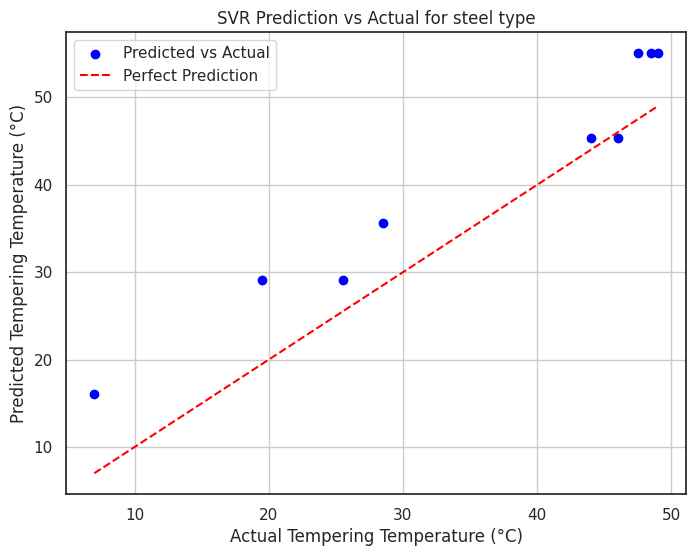

The following is the result prediction **after** applying standardization to the features samples using a **linear kernel**:

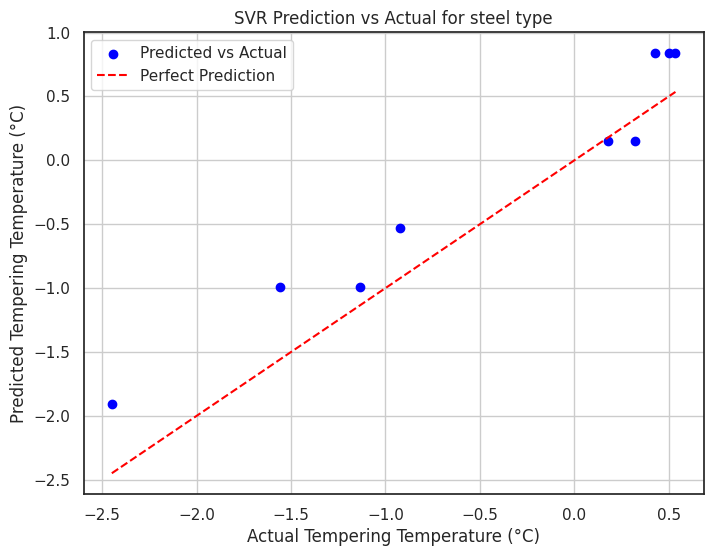

In view of the result, seems the SVR library already have mecansisms to handle automatically standardization or scaling if it's needed.

The SVR model has been tested using different kernels, getting the best performance using polynomical kernel of degree 2:

*   Mean Squared Error: 0.11939384378567688
*   R-squared: 0.878338082174754

In [473]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

svr_model = SVR(kernel='poly', degree=2, epsilon=0.1, gamma='scale') #After fine tunning with different parameters
svr_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

y_pred = svr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.11939384378567688
R-squared: 0.8802200468226693



*   Mean Squared Error: 0.12126974194077732
*   R-squared: 0.878338082174754


After using **Poly kernel** the model seems to slightly improve against the **RBF kernel**.

Indeed, it's demonstrated that the model performs better with non-linear regressions rather that linear regression as discussed before.

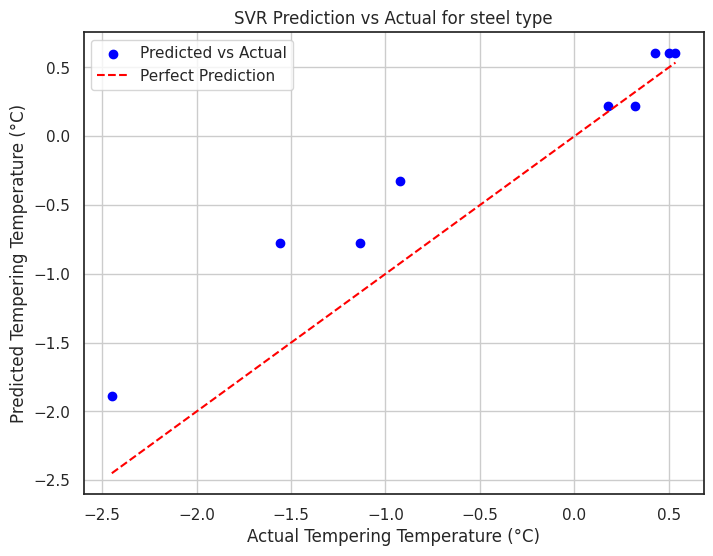

In [474]:
steel_type_index = 0 # Example steel alloy.
relevant_indices = np.where(X_test[:, steel_type_index] == 1)[0]

X_test_subset = X_test[relevant_indices, 1:]  # Skip the first column (steel type)
y_test_subset = y_test[relevant_indices]
y_pred_subset = y_pred[relevant_indices]

plt.figure(figsize=(8, 6))
plt.scatter(y_test_subset, y_pred_subset, label='Predicted vs Actual', color='blue')
plt.plot([min(y_test_subset), max(y_test_subset)], [min(y_test_subset), max(y_test_subset)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Tempering Temperature (°C)")
plt.ylabel("Predicted Tempering Temperature (°C)")
plt.title("SVR Prediction vs Actual for steel type") # Replace the placeholder for the actual steel type
plt.legend()
plt.grid(True)
plt.show()

**6. Predict model**

In [475]:
print(category_to_index)

{'AISI-SAE 1026': 0, 'AISI-SAE 1030': 1, 'AISI-SAE 1035': 2, 'AISI-SAE 1038': 3, 'AISI-SAE 1040': 4, 'AISI-SAE 1042': 5, 'AISI-SAE 1045': 6, 'AISI-SAE 1049': 7, 'AISI-SAE 1050': 8, 'AISI-SAE 1065': 9, 'AISI-SAE 1080': 10, 'AISI-SAE 1335': 11, 'AISI-SAE 2340': 12, 'AISI-SAE 3140': 13, 'AISI-SAE 4027': 14, 'AISI-SAE 4037': 15, 'AISI-SAE 4047': 16, 'AISI-SAE 4068': 17, 'AISI-SAE 4140': 18, 'AISI-SAE 4340': 19, 'AISI-SAE 4640': 20, 'AISI-SAE 5140': 21, 'AISI-SAE 5160': 22, 'AISI-SAE 6145': 23, 'AISI-SAE 6150': 24, 'AISI-SAE 9264': 25, 'AISI-SAE E52100': 26, 'Nitriding Steel ': 27, '0,31%C - plain carbon steel': 28, '0,56%C - plain carbon steel': 29, '0,74%C - plain carbon steel': 30, '0,89%C - plain carbon steel': 31, '0,98%C - plain carbon steel': 32, '1,15%C - plain carbon steel': 33}


In [476]:
steel_alloy = 'AISI-SAE 1049'
random_temperatures = np.random.randint(100, 801, size=50)

if not steel_alloy in category_to_index.keys():
  print(f"Category {steel_alloy} not found in the dataset.")
  exit(1)

In [477]:

random_input_features = []
for temp in random_temperatures:
  input_features = np.zeros(len(category_to_index) + 1)
  input_features[category_to_index[steel_alloy]] = 1
  temperature_std = (temp - mean[-1]) / std_dev[-1]
  input_features[-1] = temperature_std
  random_input_features.append(input_features)


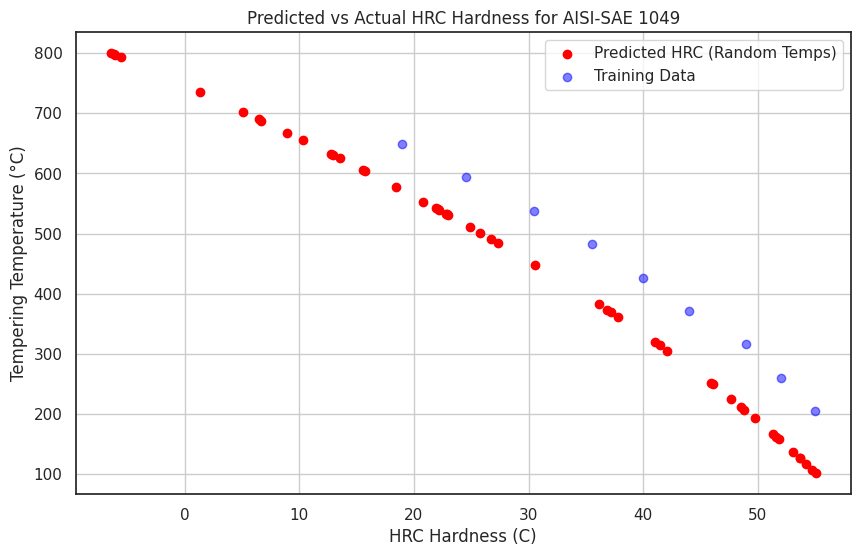

In [478]:
random_input_features = np.array(random_input_features)
predicted_hrc = svr_model.predict(random_input_features)
predicted_hrc = mean[0] + std_dev[0] * predicted_hrc

plt.figure(figsize=(10, 6))

plt.scatter(predicted_hrc, random_temperatures, color='red', label='Predicted HRC (Random Temps)')

subset = dataset[dataset['Steel type'] == steel_alloy]
plt.scatter(mean[0] + std_dev[0] * subset["Final HRC"], mean[-1] + std_dev[-1] * subset["Tempering temperature (ºC)"], color='blue', label='Training Data', alpha=0.5)

plt.ylabel("Tempering Temperature (°C)")
plt.xlabel("HRC Hardness (C)")
plt.title(f"Predicted vs Actual HRC Hardness for {steel_alloy}")
plt.legend()
plt.grid(True)
plt.show()

**7. Optimization of hyperparameters**

In [479]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
    'epsilon': [0.001, 0.01, 0.1, 1]
}

In [480]:
from sklearn.model_selection import GridSearchCV

svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

KeyboardInterrupt: 

After running multiple GridSearch possible values, it returns:
Best Parameters: {'C': 100, 'epsilon': 0.1, 'gamma': 0.01}
Which after training the model with them, gets much worst metrics:

Mean Squared Error: 0.6735943628597558
R-squared: 0.32422729107633774

In [481]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE:", -scores.mean())

Cross-Validation MSE: 0.12286041054314936


Cross-Validation MSE: 0.12286041054314936